In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

import pandas as pd

In [2]:
df = pd.read_csv('stage1NoDumWithDemo.csv')
label = 'no_affidavit'
X, y = df.drop(label, axis=1), df[label]
X = X.drop(['officer_gender', 'officer_race', 'rank', 'complainant_gender', 'complainant_race', 'crid', 'Unnamed: 0'], axis=1)
X = X.fillna(df.mean())
X

,officer_id,beat,investigator_id,weekend,police_investigator,officers_age,agesqrd,rodents_count_7days500m,rodents_count_3months500m,rodents_count_7days1000m,...,ptnlwh,ptnloth,ptl,ptlths,pthsged,ptsomeco,ptbaplus,ptpov,pctfb,complainant_age
0,4603,1414,625.000000,1,1,41.157503,1788.006081,10.000000,26.000000,30.000000,...,44.0,2.1,45.3,14.6,24.0,18.1,43.3,0.216175,26.5,42.295128
1,7033,1933,833.000000,1,1,53.000000,2809.000000,9.000000,60.000000,30.000000,...,84.9,4.4,4.8,1.6,3.9,8.2,86.3,0.211413,9.0,53.400000
2,6732,1933,833.000000,1,1,49.000000,2401.000000,9.000000,60.000000,30.000000,...,84.9,4.4,4.8,1.6,3.9,8.2,86.3,0.211413,9.0,53.400000
3,8650,1933,833.000000,1,1,57.000000,3249.000000,9.000000,60.000000,30.000000,...,84.9,4.4,4.8,1.6,3.9,8.2,86.3,0.211413,9.0,53.400000
4,0,321,1451.000000,1,1,41.157503,1788.006081,4.981339,1.000000,7.000000,...,0.0,0.0,1.0,22.7,24.0,37.6,15.7,0.336253,2.2,42.295128
5,0,2234,316.000000,0,0,41.157503,1788.006081,4.981339,34.572789,1.000000,...,1.0,0.9,0.3,18.1,31.6,31.0,19.4,0.273673,1.4,29.100000
6,8434,733,333.000000,1,1,52.000000,2704.000000,6.000000,20.000000,24.000000,...,0.0,0.4,0.0,25.7,36.6,35.7,2.0,0.419580,0.0,38.300000
7,3781,733,333.000000,1,1,41.000000,1681.000000,6.000000,20.000000,24.000000,...,0.0,0.4,0.0,25.7,36.6,35.7,2.0,0.419580,0.0,38.300000
8,7226,1722,981.000000,1,0,41.000000,1681.000000,3.000000,9.000000,4.000000,...,37.1,1.8,53.8,29.3,30.5,21.1,19.0,0.166779,49.5,40.200000
9,5117,1133,1278.000000,1,0,26.000000,676.000000,3.000000,15.000000,3.000000,...,1.3,3.3,3.2,36.0,25.4,25.6,13.0,0.606905,0.7,41.200000


In [3]:
X.shape

(18721, 109)

In [4]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

In [5]:
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [6]:
columns = X.columns
print("Feature ranking:")
for f in range(X.shape[1]):
    
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], columns[f], importances[indices[f]]))

Feature ranking:
1. feature 4 officer_id (0.070387)
2. feature 89 beat (0.065578)
3. feature 0 investigator_id (0.050727)
4. feature 5 weekend (0.011651)
5. feature 108 police_investigator (0.010848)
6. feature 6 officers_age (0.010600)
7. feature 42 agesqrd (0.010305)
8. feature 88 rodents_count_7days500m (0.009817)
9. feature 84 rodents_count_3months500m (0.009786)
10. feature 18 rodents_count_7days1000m (0.009625)
11. feature 40 rodents_count_3months1000m (0.009464)
12. feature 47 rodents_count_7days2500m (0.009291)
13. feature 48 rodents_count_3months2500m (0.009162)
14. feature 59 garbage_count_7days500m (0.009143)
15. feature 46 garbage_count_3months500m (0.009085)
16. feature 85 garbage_count_7days1000m (0.009038)
17. feature 2 garbage_count_3months1000m (0.008990)
18. feature 81 garbage_count_7days2500m (0.008965)
19. feature 38 garbage_count_3months2500m (0.008964)
20. feature 65 sanitation_count_7days500m (0.008869)
21. feature 76 sanitation_count_3months500m (0.008792)
22. f

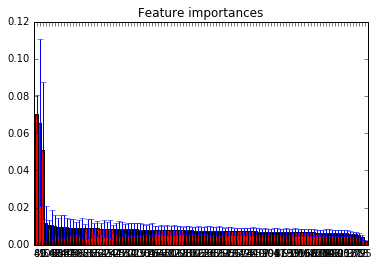

In [7]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [9]:
indices

array([  4,  89,   0,   5, 108,   6,  42,  88,  84,  18,  40,  47,  48,
        59,  46,  85,   2,  81,  38,  65,  76,  52,  22,  41,  24,  50,
        44,  23,  17,  53,  80,  14,  72,  20,  15,  30,  77,  61,  16,
        45,  64,  63,  58,  21,  70,  32,  13,  29,  68,  28,  71,  51,
        60,  82,  73,  62,  26,  36,  35,  87,  86,  39,  57,  78,  12,
        56,  67,  11,  49,  74,  27,  34,  55,  10,   9,   7,  90, 106,
        94,   8,  37,   1,  69,  95,  33,  19,  91, 105,  96, 102,  66,
        43,  93, 100, 104,  98,  54, 103,  92,  99, 101,  25, 107,   3,
        97,  31,  79,  83,  75])

In [10]:
importances

array([ 0.0507268 ,  0.00698777,  0.00899039,  0.00589762,  0.07038704,
        0.01165051,  0.01060038,  0.00711371,  0.00704125,  0.00713657,
        0.00714236,  0.00729488,  0.00733974,  0.00785317,  0.00830376,
        0.00818293,  0.00811708,  0.00854277,  0.00962529,  0.00684   ,
        0.00829509,  0.00792749,  0.00867889,  0.00856517,  0.00861561,
        0.00626568,  0.00757674,  0.00724175,  0.0077741 ,  0.00782146,
        0.00817295,  0.00554613,  0.00786409,  0.0068422 ,  0.00724155,
        0.00753611,  0.00756835,  0.00703068,  0.0089641 ,  0.007489  ,
        0.00946351,  0.00866461,  0.01030549,  0.00664931,  0.00860624,
        0.00810064,  0.00908484,  0.00929096,  0.00916172,  0.00727822,
        0.00860951,  0.00770365,  0.00871529,  0.00852381,  0.00655207,
        0.00718515,  0.00730696,  0.00745004,  0.00794035,  0.00914338,
        0.00765773,  0.00816501,  0.00758754,  0.00799242,  0.00804953,
        0.00886851,  0.00667043,  0.00730522,  0.00778733,  0.00

In [13]:
pd.factorize(df['officer_gender'])

(array([ 0,  1,  0, ..., -1, -1, -1]), Index(['M', 'F'], dtype='object'))

In [14]:
df

,Unnamed: 0,crid,officer_id,no_affidavit,beat,investigator_id,officer_race,officer_gender,weekend,rank,...,ptl,ptlths,pthsged,ptsomeco,ptbaplus,ptpov,pctfb,complainant_gender,complainant_race,complainant_age
0,0,1043963,4603,1,1414,625,Hispanic,M,1,SGT,...,45.3,14.6,24.0,18.1,43.3,0.216175,26.5,M,Unknown,NaN
1,1,1043965,7033,0,1933,833,Black,F,1,PO,...,4.8,1.6,3.9,8.2,86.3,0.211413,9.0,M,White,53.4
2,2,1043965,6732,0,1933,833,Hispanic,M,1,PO,...,4.8,1.6,3.9,8.2,86.3,0.211413,9.0,M,White,53.4
3,3,1043965,8650,0,1933,833,White,M,1,PO,...,4.8,1.6,3.9,8.2,86.3,0.211413,9.0,M,White,53.4
4,4,1043966,0,0,321,1451,NaN,NaN,1,UNKNOWN,...,1.0,22.7,24.0,37.6,15.7,0.336253,2.2,NaN,NaN,NaN
5,5,1043968,0,0,2234,316,NaN,NaN,0,UNKNOWN,...,0.3,18.1,31.6,31.0,19.4,0.273673,1.4,M,Black,29.1
6,6,1043975,8434,0,733,333,Black,M,1,PO,...,0.0,25.7,36.6,35.7,2.0,0.419580,0.0,M,Black,38.3
7,7,1043975,3781,0,733,333,Black,F,1,PO,...,0.0,25.7,36.6,35.7,2.0,0.419580,0.0,M,Black,38.3
8,8,1043977,7226,0,1722,981,White,M,1,DET,...,53.8,29.3,30.5,21.1,19.0,0.166779,49.5,F,White/Hispanic,40.2
9,9,1043981,5117,1,1133,1278,Asian,M,1,PO,...,3.2,36.0,25.4,25.6,13.0,0.606905,0.7,F,Black,41.2
